# New York City Airbnb 

# --------------------------------------------------------------------------------------------------------

## Data Analysis And Visualization 

In [1]:
#Packages for analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading and visualizing the dataset 
airbnb=pd.read_csv('AB_NYC_2019.csv')

In [4]:
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [5]:
airbnb.shape

(48895, 16)

In [6]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#Removing the duplicates value from the data frame so that each row is authentic while doing the modelling
airbnb.duplicated().sum()

airbnb.drop_duplicates(inplace=True)

In [10]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Exploring the correlation between different columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

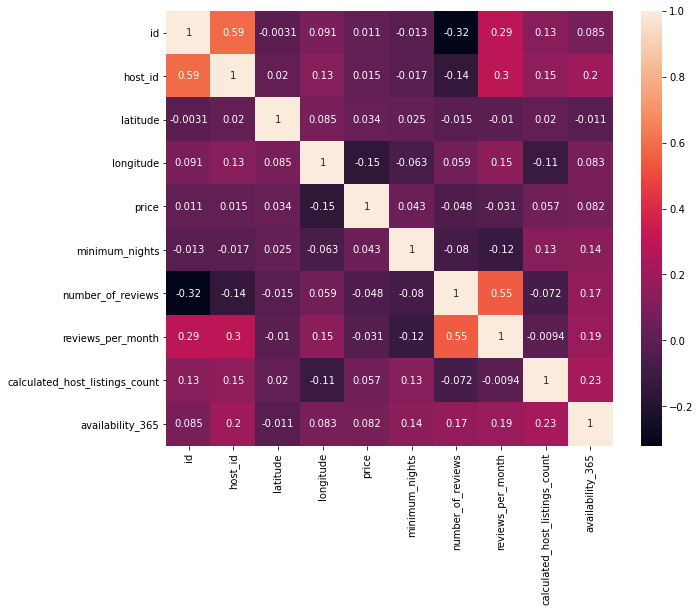

In [11]:
corr=airbnb.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
airbnb.columns

# --------------------------------------------------------------------------------------------------------

In [12]:
#Calculating the null values and drawing insights from that
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### After loading the dataset and viewing dataset we can see a number of things. These 16 columns provide for deep data exploration .We do already see some missing values, which will require cleaning and handling of NaN values. 

#### Missing data that is observed does not need too much cleaning. Looking at the dataset we can say that columns "name" and "host_name" are insignificant , column "last_review" is date, if there were no reviews for the listing - date simply will not exist.

In [13]:
#dropping columns that are not significant 
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(3)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [14]:
#Replace the 'reviews per month' by zero
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [15]:
#let's proceed with examing some categorical unique values

#examining the unique values of neighbourhood_group 
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

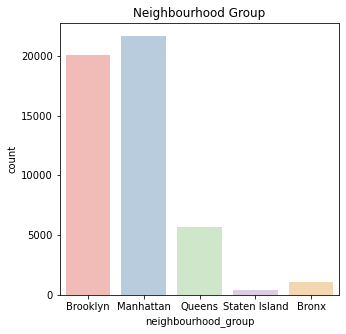

In [16]:
#To find count of occurances of each neighborhood group
sns.countplot(airbnb['neighbourhood_group'], palette="Pastel1")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Neighbourhood Group')

# --------------------------------------------------------------------------------------------------------

#### Prices for each neighborhood group

In [17]:
#analyzing prices for each neighborhood group
B=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_B=B[['price']]
#Manhattan
M=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_M=M[['price']]
#Queens
Q=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_Q=Q[['price']]
#Staten Island
S=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_S=S[['price']]
#Bronx
R=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_R=R[['price']]
#putting all the prices' dfs in the list
price_list=[price_B, price_M, price_Q, price_S, price_R]

In [18]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group

l=[]
#creating list with known values in neighbourhood_group column

neib_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    l.append(i)

#changing names of the price column to the area name for easier reading of the table    
l[0].rename(columns={'price':neib_list[0]}, inplace=True)
l[1].rename(columns={'price':neib_list[1]}, inplace=True)
l[2].rename(columns={'price':neib_list[2]}, inplace=True)
l[3].rename(columns={'price':neib_list[3]}, inplace=True)
l[4].rename(columns={'price':neib_list[4]}, inplace=True)

#finilizing our dataframe for final view    
stat_df=l
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


# --------------------------------------------------------------------------------------------------------

#### We can see from the data frame that shows the price statistics that there are various extreme values for the prices in each neighborhood group

Text(0.5, 1.0, 'Density/distribution of prices for each neighberhood_group with no extreme values')

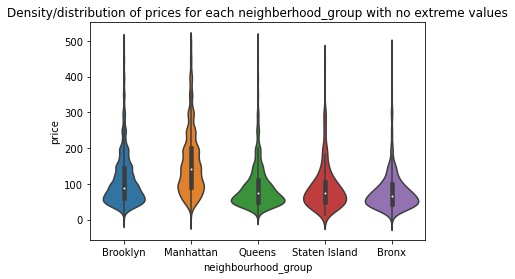

In [19]:
#creating a sub-dataframe with no extreme values / less than 500
no_ext=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=no_ext, x='neighbourhood_group', y='price')
viz_2.set_title('Density/distribution of prices for each neighberhood_group with no extreme values')

# --------------------------------------------------------------------------------------------------------

#### Boxplot to potray the reltionship between the neighbourhood group and the availability of rooms

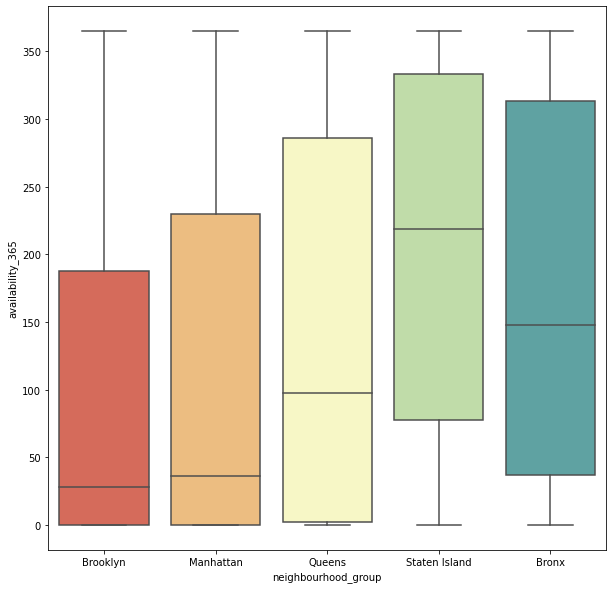

In [20]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='Spectral')

# --------------------------------------------------------------------------------------------------------

## MAPS

#### Regions belonging to each neighborhood group using the latitude and longtitude provided

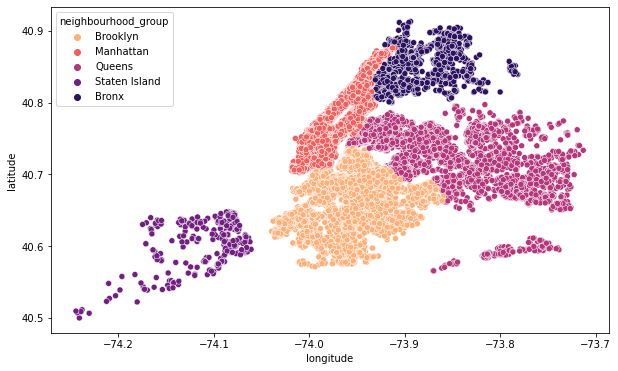

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group,palette='magma_r')
plt.ioff()

## -------------------------------------------------------------------------------------------------------------------------

#### Availbale roomtypes around all neighborhood groups together

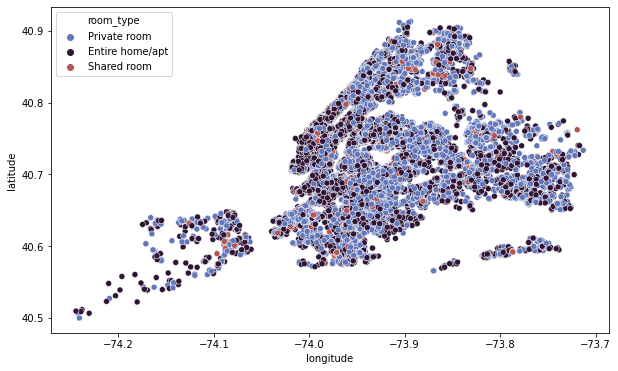

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type,palette='twilight')
plt.ioff()

## --------------------------------------------------------------------------------------------------------------------------

#### Availabilty of rooms across all neighbourhood groups together

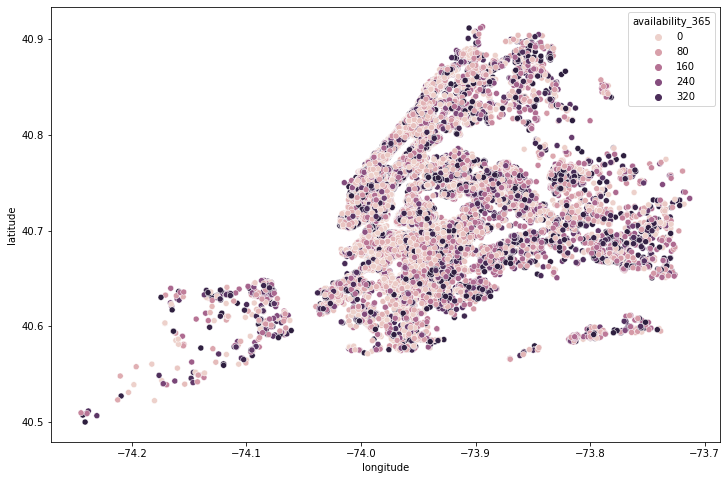

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

# --------------------------------------------------------------------------------------------------------


#### Word cloud with image

In [24]:
!pip install wordcloud

In [25]:
from PIL import Image

def makeWordCloudImage(text, colormap="viridis", imageUrl=None):
    if imageUrl is not None:
        nyc_mask = np.array(Image.open(imageUrl))
        wc = WordCloud(background_color="white", colormap=colormap, mask=nyc_mask, contour_width=1.5, contour_color='steelblue')
    else:
        wc = WordCloud(background_color="white",width=1920, height=1080,max_font_size=200, max_words=200, colormap=colormap)
    wc.generate(text)
    
    # Show WordCloud
    f, ax = plt.subplots(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [26]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

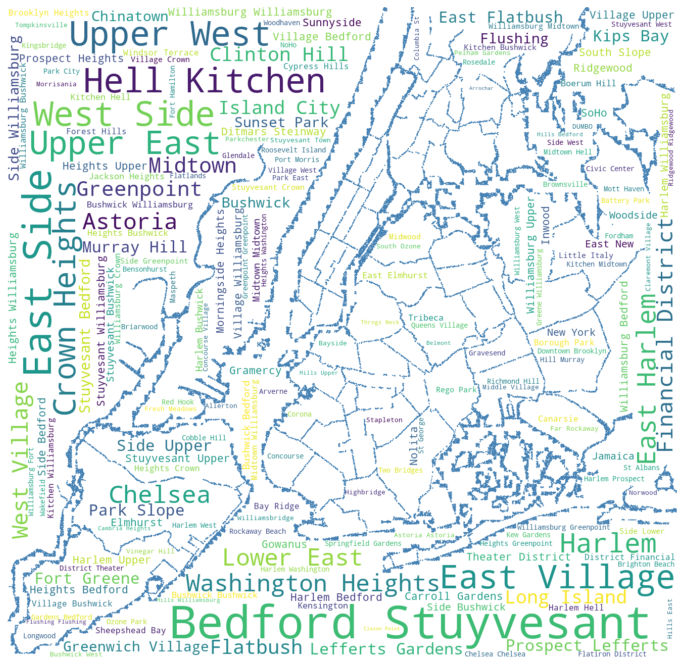

In [27]:
neighbourhood_text = " ".join([neighbourhood for neighbourhood in airbnb["neighbourhood"]])
makeWordCloudImage(neighbourhood_text, imageUrl="New_York_City_.png")

# --------------------------------------------------------------------------------------------------------

#### Hist plots for prices in each neighborhood group

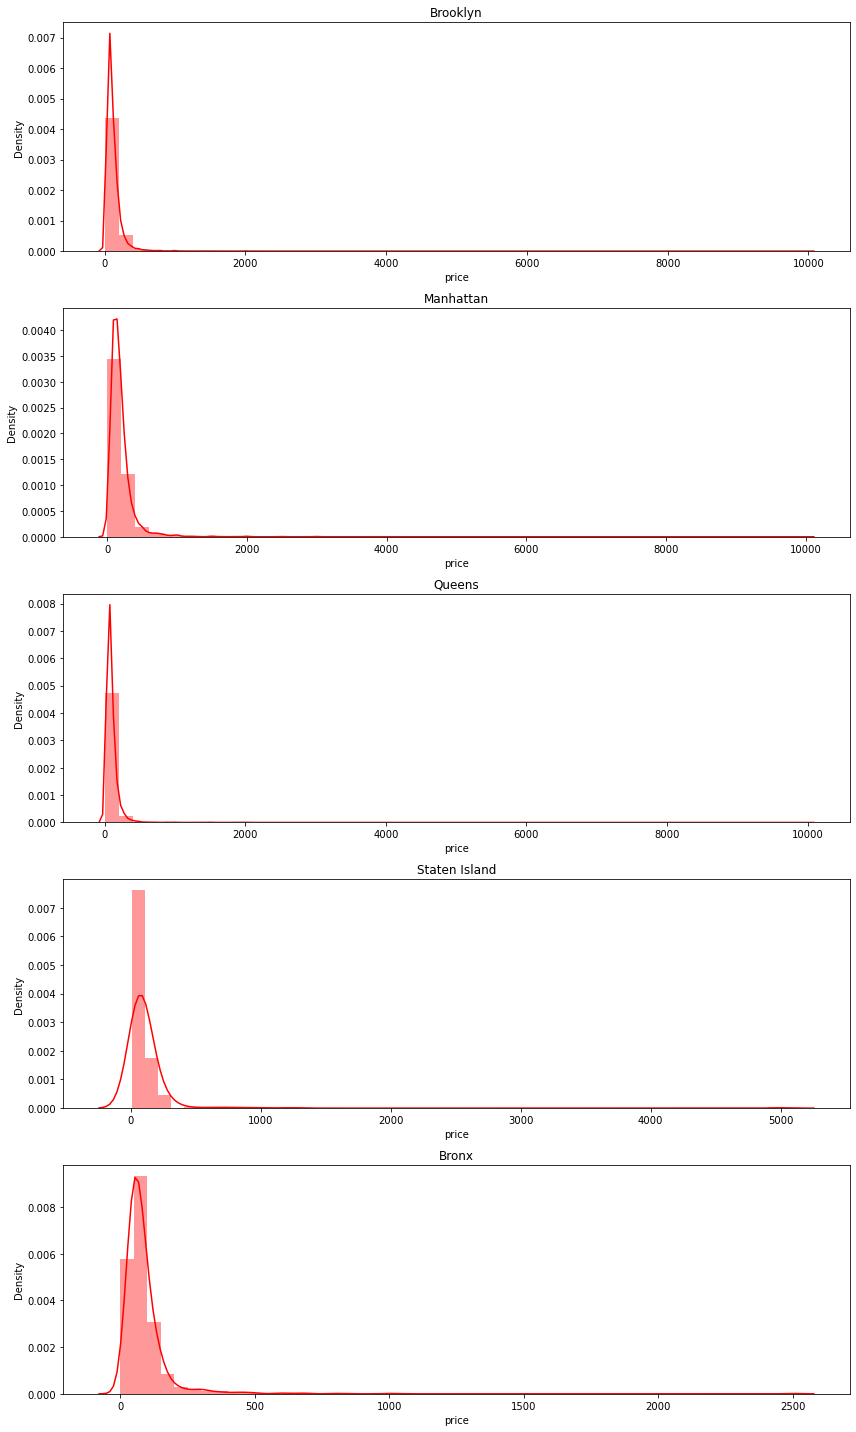

In [28]:
f, subplots = plt.subplots(
                len(airbnb.neighbourhood_group.unique()), 
                figsize=(12, 20)
            )

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb[airbnb.neighbourhood_group == neighbourhood_group]['price']
    ax = subplots[i]
    dist_plot = sns.distplot(neighbourhoods, ax=ax,color='r')
    dist_plot.set_title(neighbourhood_group)

# Finalize the plot
plt.tight_layout(h_pad=1)
plt.show()

# --------------------------------------------------------------------------------------------------------

#### Pairplots for the specified columns

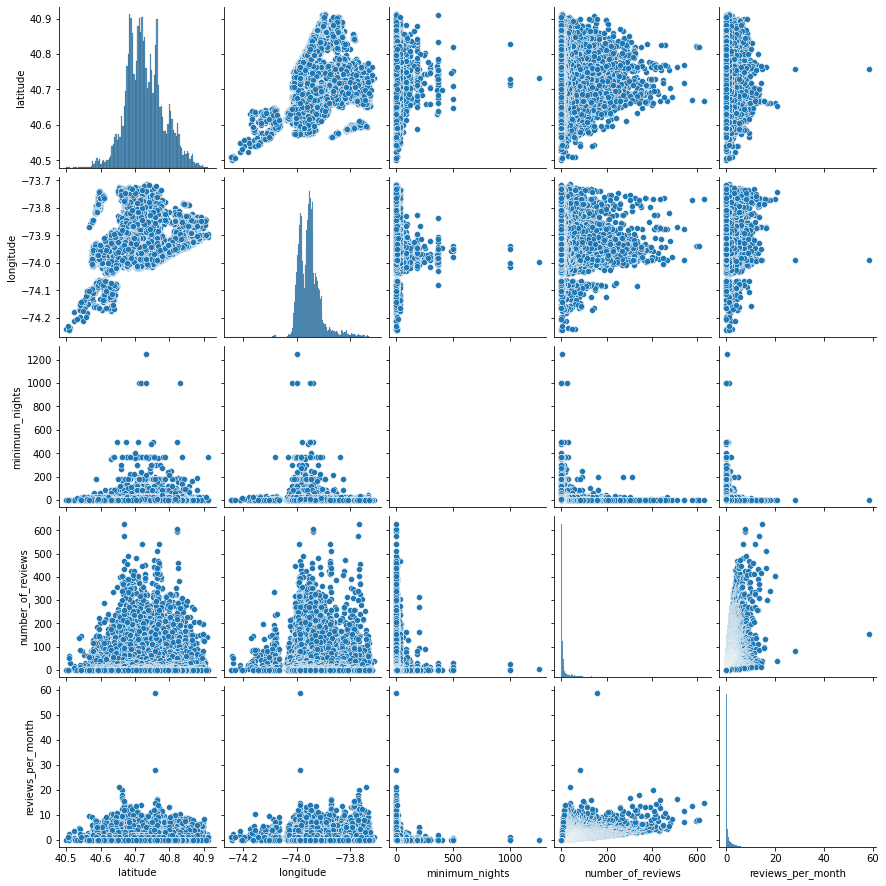

In [29]:
df = airbnb[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month']]
sns.pairplot(df)

# --------------------------------------------------------------------------------------------------------

# Modeling and predicting prices

# MODELLING 

Modelling : Predictive modelling provides the ability to automatically create accurate predictive models about future. There are also options to choose the best solution with multi-modal evaluation.

Price Predictions in order to predict possible future prices based on real Airbnb's price data. Using Machine Learning techniques and with the power of Linear Regression Models & Decisions Tree algorithms.

#### Price predictions

In [75]:




from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,scale, StandardScaler, RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# --------------------------------------------------------------------------------------------------------

# MODELS AND PREDICTIONS

In [56]:
model_df=pd.read_csv('AB_NYC_2019.csv')

Before examining price feature, categorical variables will be mapped with help of cat.code. This will assist to make easier and comprehensible data analysis and numerical values will make it easier to model,fet and predict.

In [61]:
model_df['neighbourhood_group']= model_df['neighbourhood_group'].astype("category").cat.codes
model_df['neighbourhood'] = model_df['neighbourhood'].astype("category").cat.codes
model_df['room_type'] = model_df['room_type'].astype("category").cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  int8   
 5   neighbourhood                   48895 non-null  int16  
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  int8   
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [62]:
nyc_model = model_df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])
nyc_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Number of reviews feature has some missing data. For this feature, missing data will be replaced with mean. Since the data is more symmetric, mean replacement would be better.

In [63]:
mean = nyc_model['reviews_per_month'].mean()
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [64]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

Feature Selection and GridSearch
First, Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [65]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [66]:
#Secondly, data will be split in a 70–30 ratio

X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

Now it is time to build a feature importance graph. For this Extra Trees Classifier method will be used. In the below code, lowess=True makes sure the lowest regression line is drawn.

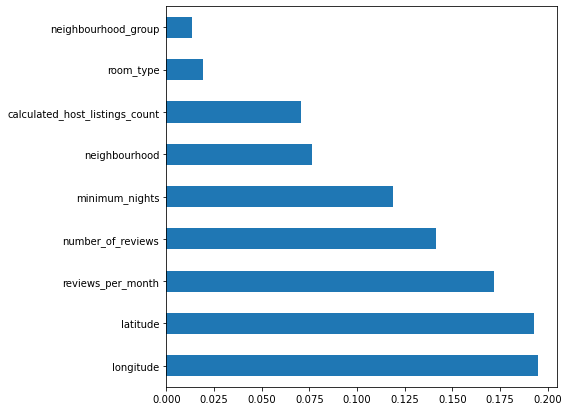

In [68]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=nyc_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The above graph shows the feature importance of dataset. According to that, neighborhood group and room type have the lowest importance on the model.

In [69]:
def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)

In [70]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

# lasso_reg(nyc_model_x, nyc_model_y)

In [71]:
def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

# elastic_reg(nyc_model_x, nyc_model_y)

### K-Fold Cross Validation
Before model building, 5-Fold Cross Validation will be implemented for validation.

In [72]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in kfold_cv.split(nyc_model_x,nyc_model_y):
    X_train, X_test = nyc_model_x[train_index], nyc_model_x[test_index]
    y_train, y_test = nyc_model_y[train_index], nyc_model_y[test_index]

### Polynomial Transformation
The polynomial transformation will be made with a second degree which adding the square of each feature.

In [73]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

## Model Prediction


In [74]:
#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

# Modelling Without All Features

In [91]:
nyc_model_xx= nyc_model.drop(columns=['neighbourhood_group', 'room_type']) #Since they have low importance 

nyc_model_xx, nyc_model_yx = nyc_model_xx.iloc[:,:-1], nyc_model_xx.iloc[:,-1]

X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(nyc_model_xx, nyc_model_yx, test_size=0.3,random_state=42)
scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(nyc_model_xx)

#K-Fold Cross Validation
kfold_cv=KFold(n_splits=4, random_state=42, shuffle=False)
for train_index, test_index in kfold_cv.split(nyc_model_xx,nyc_model_yx):
    X_train_x, X_test_x = nyc_model_xx[train_index], nyc_model_xx[test_index]
    y_train_x, y_test_x = nyc_model_yx[train_index], nyc_model_yx[test_index]
    
    
#Polynomial Transformation
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = Poly.fit_transform(X_train_x)
X_test_x = Poly.fit_transform(X_test_x)

## Model Prediction

In [84]:

###Ridge
ridge_x = Ridge(alpha = 0.01, normalize = True)
ridge_x.fit(X_train_x, y_train_x)           
pred_ridge_x = ridge_x.predict(X_test_x) 

###Lasso
Lasso_x = Lasso(alpha = 0.001, normalize =False)
Lasso_x.fit(X_train_x, y_train_x)
pred_Lasso_x = Lasso_x.predict(X_test_x) 

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.01, normalize=False)
model_enet_x.fit(X_train_x, y_train_x) 
pred_train_enet_x= model_enet_x.predict(X_train_x)
pred_test_enet_x= model_enet_x.predict(X_test_x)

## Model Comparison



Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

In [93]:
print('---------------Ridge ---------------------')

print('--WITH ALL FEATURES--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('--WITHOUT ALL FEATURES--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_ridge_x)))   
print('R2 %f' % r2_score(y_test_x, pred_ridge_x))




print('---------------Lasso-----------------------')

print('--WITH ALL FEATURES--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))


print('--WITHOUT ALL FEATURES--')
print('MAE: %f' % mean_absolute_error(y_test_x, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, pred_Lasso_x)))
print('R2 %f' % r2_score(y_test_x, pred_Lasso_x))



print('---------------ElasticNet-------------------')

print('--WITH ALL FEATURES--')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))


print('--WITHOUT ALL FEATURES--')
print('MAE: %f' % mean_absolute_error(y_test_x,pred_test_enet_x)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,pred_test_enet_x))) #RMSE
print('R2 %f' % r2_score(y_test_x, pred_test_enet_x))

---------------Ridge ---------------------
--WITH ALL FEATURES--
MAE: 110.852661
RMSE: 144.396698
R2 -0.209997
--WITHOUT ALL FEATURES--
MAE: 133.315044
RMSE: 213.975787
R2 -1.646052
---------------Lasso-----------------------
--WITH ALL FEATURES--
MAE: 113.401100
RMSE: 150.339514
R2 -0.311644
--WITHOUT ALL FEATURES--
MAE: 135.888027
RMSE: 228.137700
R2 -2.007899
---------------ElasticNet-------------------
--WITH ALL FEATURES--
MAE: 110.913009
RMSE: 144.147695
R2 -0.205827
--WITHOUT ALL FEATURES--
MAE: 129.696170
RMSE: 195.909213
R2 -1.218089


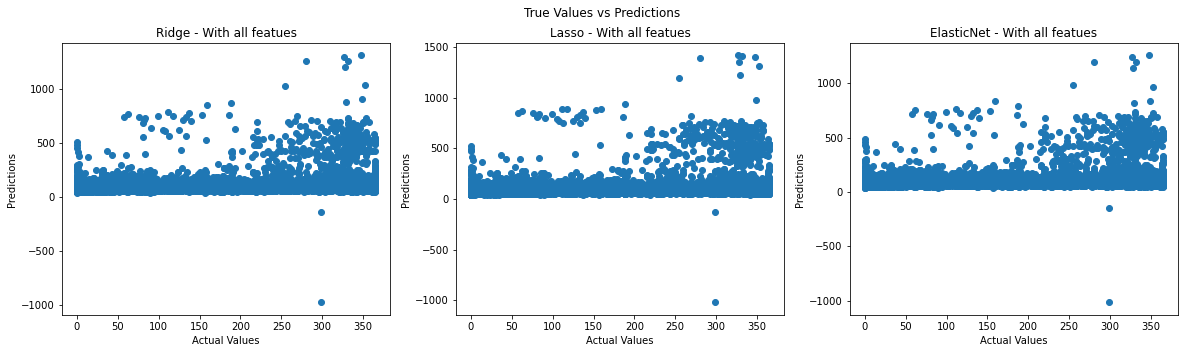

In [90]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('True Values vs Predictions')



ax1.scatter(y_test, pred_ridge)
ax1.set_title('Ridge - With all featues')

ax2.scatter(y_test, pred_Lasso)
ax2.set_title('Lasso - With all featues')

ax3.scatter(y_test, pred_test_enet)
ax3.set_title('ElasticNet - With all featues')



for ax in fig.get_axes():
    ax.set(xlabel='Actual Values', ylabel='Predictions')

# --------------------------------------------------------------------------------------------------------

# XGB

#### XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm

Regularization:
Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

Parallel Processing:
XGBoost implements parallel processing and is blazingly faster as compared to GBM.
XGBoost also supports implementation on Hadoop.

High Flexibility
XGBoost allows users to define custom optimization objectives and evaluation criteria.
This adds a whole new dimension to the model and there is no limit to what we can do.
Handling Missing Values

XGBoost has an in-built routine to handle missing values.
The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.

Tree Pruning:
A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.

Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

Built-in Cross-Validation
XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
Continue on Existing Model

User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
GBM implementation of sklearn also has this feature so they are even on this point.

xgb – this is the direct xgboost library. I will use a specific function “cv” from this library


XGBClassifier – this is an sklearn wrapper for XGBoost. This allows us to use sklearn’s Grid Search with parallel processing in the same way we did for GBM

In [42]:
lg_df=pd.read_csv('AB_NYC_2019.csv')

In [43]:
lg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [44]:
print('Number of features: {}'.format(lg_df.shape[1]))
print('Number of examples: {}'.format(lg_df.shape[0]))

Number of features: 16
Number of examples: 48895


In [45]:
lg_df['last_review'] = pd.to_datetime(lg_df['last_review'],infer_datetime_format=True) 

# Preprocessing

Missing data

In [46]:
total = lg_df.isnull().sum().sort_values(ascending=False)
percent = (lg_df.isnull().sum())/lg_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [47]:
lg_df.drop(['host_name','name'], axis=1, inplace=True)


In [48]:
lg_df[lg_df['number_of_reviews']== 0.0].shape

(10052, 14)

The NaN values in the last_review and reviews_per_month columns all occur for examples where no reviews were given.

For reviews_per_month, fill those values with 0's.

In [49]:
lg_df['reviews_per_month'] = lg_df['reviews_per_month'].fillna(0)
earliest = min(lg_df['last_review'])
lg_df['last_review'] = lg_df['last_review'].fillna(earliest)
lg_df['last_review'] = lg_df['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())
total = lg_df.isnull().sum().sort_values(ascending=False)
percent = (lg_df.isnull().sum())/lg_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
last_review,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0


The target has a highly skewed distribution. This can cause problems for machine learning algorithms. A log transformation and removal of outliers makes the distribution look much closer to normal.

In [50]:
lg_df = lg_df[np.log1p(lg_df['price']) < 8]
lg_df= lg_df[np.log1p(lg_df['price']) > 3]
lg_df['minimum_nights'] = np.log1p(lg_df['minimum_nights'])

In [51]:
lg_df['price'] = np.log1p(lg_df['price'])

In [80]:
#Dropping the rows that are not required

In [52]:
lg_df = lg_df.drop(['host_id', 'id'], axis=1)

In [81]:
#Filtering values based on certain values

In [53]:
lg_df['reviews_per_month'] = lg_df[lg_df['reviews_per_month'] < 17.5]['reviews_per_month']

# Feature engineering


In [82]:
#Making new necessary columns in the bataframe

In [32]:
lg_df['all_year_avail'] = lg_df['availability_365']>353
lg_df['low_avail'] =lg_df['availability_365']< 12
lg_df['no_reviews'] =lg_df['reviews_per_month']==0

# Encoding categorical features


In [83]:
#deternming the categorical columns for encoding

In [54]:
categorical_features = lg_df.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))



Categorical features: (48784, 3)


In [84]:
#one hot encoding the categorical variables

In [55]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
#Filling Null values

In [56]:
lg_df['reviews_per_month'] = lg_df['reviews_per_month'].fillna(0)

In [87]:
#Filtering out column with numerical features
#Defining y that is the price from the filtered values

In [57]:
numerical_features =  lg_df.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (48784, 8)


In [88]:
#concatenate the numerical and categorical data frames

In [58]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [59]:
Processed_data = pd.concat([X_df, y], axis = 1)

# Train-test split

In [89]:
#Split into train and test dataset

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Rescale the design matrix

now scale the design matrix with sklearn's RobustScaler() so that each predictor has zero mean and unit variance. This helps the convergence of machine learning algorithms 

In [67]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
                              

### XGBoost Regressor

In [90]:
#XGB withh default values

In [76]:
n_folds = 5
xgb_baseline = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping=5)
kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
cv_res = cross_val_score(xgb_baseline, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
xgb_baseline.fit(X_train, y_train)
y_train_xgb_base = xgb_baseline.predict(X_train)
y_test_xgb_base = xgb_baseline.predict(X_test)
xgb_baseline_results = pd.DataFrame({'algorithm':['XGBRegressor[baseline]'],
            'CV error': cv_res.mean(), 
            'CV std': cv_res.std(),
            'training error': [mean_squared_error(y_train_xgb_base, y_train)]})

[20:01:55] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:02:59] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:04:09] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


In [91]:
#Results

In [77]:
print(xgb_baseline)
xgb_baseline_results

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=5, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


,algorithm,CV error,CV std,training error
0,XGBRegressor[baseline],-0.172141,0.004435,0.123715


###  Learning rate optimization

In [92]:
#Optimizing learning rates and then observing the parameters again

In [78]:
d = {'Learning Rate':[],
            'Mean CV Error': [],
            'CV Error Std': [],
            'Training Error': []}
for lr in [0.01, 0.05, 0.1, 0.5]:
    continue
    xgb_model = XGBRegressor(n_estimators=1000, learning_rate=lr, early_stopping=5)
    cv_res = -cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    xgb_model.fit(X_train, y_train)
    y_train_xgb = xgb_model.predict(X_train)
    d['Learning Rate'].append(lr)
    d['Mean CV Error'].append(cv_res.mean())
    d['CV Error Std'].append(cv_res.std())
    
    d['Training Error'].append(mean_squared_error(y_train_xgb, y_train))


d = {'Learning Rate':[0.01, 0.05, 0.1, 0.5],
        'Mean CV Error': [0.184223, 0.177748, 0.175002, 0.188239],
        'CV Error Std': [0.00626211, 0.00575213, 0.00544426, 0.00525595],
        'Training Error': [0.179093, 0.164874, 0.154238, 0.109885]}

xgb_tuning_1 = pd.DataFrame(d)
xgb_tuning_1

,Learning Rate,Mean CV Error,CV Error Std,Training Error
0,0.01,0.184223,0.006262,0.179093
1,0.05,0.177748,0.005752,0.164874
2,0.10,0.175002,0.005444,0.154238
3,0.50,0.188239,0.005256,0.109885


In [93]:
#Plotting parameters for each learnninig rate

No handles with labels found to put in legend.


Text(0, 0.5, 'Mean Squared Error')

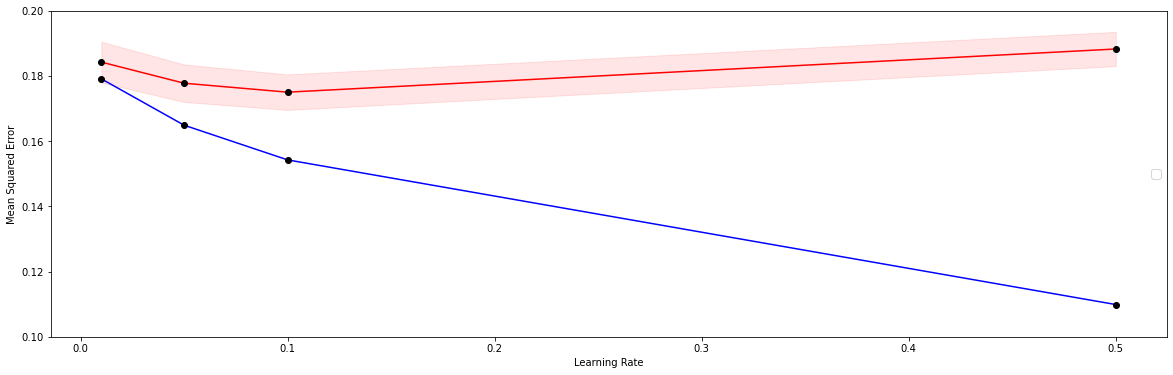

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(20,6))

ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'], color='red')
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'], 'o', color='black')
ax.fill_between(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'] - xgb_tuning_1['CV Error Std'], xgb_tuning_1['Mean CV Error'] + xgb_tuning_1['CV Error Std'], color='r', alpha=.1)
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Training Error'], color='blue')
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Training Error'], 'o', color='black')
ax.legend(fontsize=12, loc = 'center right');
ax.set_ylim(0.1, 0.2)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Mean Squared Error')

In [94]:
n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

#### Best Model

In [95]:
xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1 )
xbgreg_CV_best = -rmse_cv(xbgreg_best)
xbgreg_best.fit(X_train, y_train) 
y_train_xgbreg = xbgreg_best.predict(X_train)
y_test_xgbreg = xbgreg_best.predict(X_test)
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_xgbreg)],
            'test error': [mean_squared_error(y_test, y_test_xgbreg)],
            'training_r2_score': [r2_score(y_train, y_train_xgbreg)],
            'test_r2_score': [r2_score(y_test, y_test_xgbreg)]})
xgb_best_results

[21:27:48] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:43] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:29:44] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,XGBRegressor,0.173099,0.004799,0.117471,0.182283,0.744389,0.601344


# --------------------------------------------------------------------------------------------------------